# Estatística - Correlação e Regressão
- Fernanda Soares Lima - Turma 7 | Data Analytics <br>
Squad Katherine Johnson

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from tabulate import tabulate ## para fazer tabelas

In [124]:
df_casa=pd.read_csv('kc_house_data.csv')
df_casa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [125]:
df_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [126]:
df_casa.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [127]:
df_casa.select_dtypes(include='float64').nunique()

price        2289
bathrooms      28
floors          6
lat          4204
long          669
dtype: int64

In [128]:
df_casa.select_dtypes(include='int64').nunique()

id               9914
bedrooms           11
sqft_living       659
sqft_lot         5596
view                5
condition           5
grade              11
sqft_above        597
sqft_basement     238
yr_built          116
yr_renovated       64
zipcode            70
sqft_living15     521
sqft_lot15       5168
dtype: int64

In [129]:
df_casa.select_dtypes(include='object').nunique()

date          351
waterfront      2
dtype: int64

## Questão 1

1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pésquadrados?

In [130]:
corr_casa=df_casa.corr(numeric_only=True)
corr_casa

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005779,0.013855,0.007435,0.000415,-0.132510,0.012260,0.035295,-0.021744,0.012872,-0.007168,0.013732,0.011701,-0.015580,0.001720,0.000568,0.000084,-0.004075,-0.146583
price,0.005779,1.000000,0.299207,0.521193,0.702199,0.090720,0.276954,0.398731,0.044596,0.651100,0.607763,0.326087,0.036116,0.142752,-0.054596,0.297156,0.015786,0.583287,0.086809
bedrooms,0.013855,0.299207,1.000000,0.539449,0.573915,0.028929,0.213565,0.090767,0.023435,0.360955,0.464872,0.323817,0.164852,0.027509,-0.146440,0.001749,0.110417,0.376492,0.019946
bathrooms,0.007435,0.521193,0.539449,1.000000,0.764810,0.091268,0.494247,0.205681,-0.089029,0.660915,0.686311,0.311352,0.479104,0.070821,-0.204979,0.027687,0.217447,0.579341,0.099278
sqft_living,0.000415,0.702199,0.573915,0.764810,1.000000,0.167809,0.392802,0.293149,-0.047375,0.763526,0.869266,0.457630,0.324383,0.068572,-0.191899,0.062404,0.217292,0.750315,0.192839
sqft_lot,-0.132510,0.090720,0.028929,0.091268,0.167809,1.000000,0.021320,0.064464,-0.019324,0.121719,0.184876,0.006639,0.088609,-0.003411,-0.126821,-0.069145,0.225961,0.158669,0.690367
floors,0.012260,0.276954,0.213565,0.494247,0.392802,0.021320,1.000000,0.062255,-0.217362,0.463982,0.572961,-0.236646,0.405597,0.041302,-0.081076,0.042355,0.154666,0.327327,0.024016
view,0.035295,0.398731,0.090767,0.205681,0.293149,0.064464,0.062255,1.000000,0.044662,0.255709,0.174683,0.278300,-0.038961,0.113521,0.072961,-0.003913,-0.081587,0.289678,0.044554
condition,-0.021744,0.044596,0.023435,-0.089029,-0.047375,-0.019324,-0.217362,0.044662,1.000000,-0.126440,-0.144689,0.164491,-0.313085,-0.074973,-0.005119,-0.016654,-0.105288,-0.088211,-0.025178
grade,0.012872,0.651100,0.360955,0.660915,0.763526,0.121719,0.463982,0.255709,-0.126440,1.000000,0.760978,0.174460,0.438903,0.036942,-0.194369,0.111048,0.205292,0.731650,0.140770


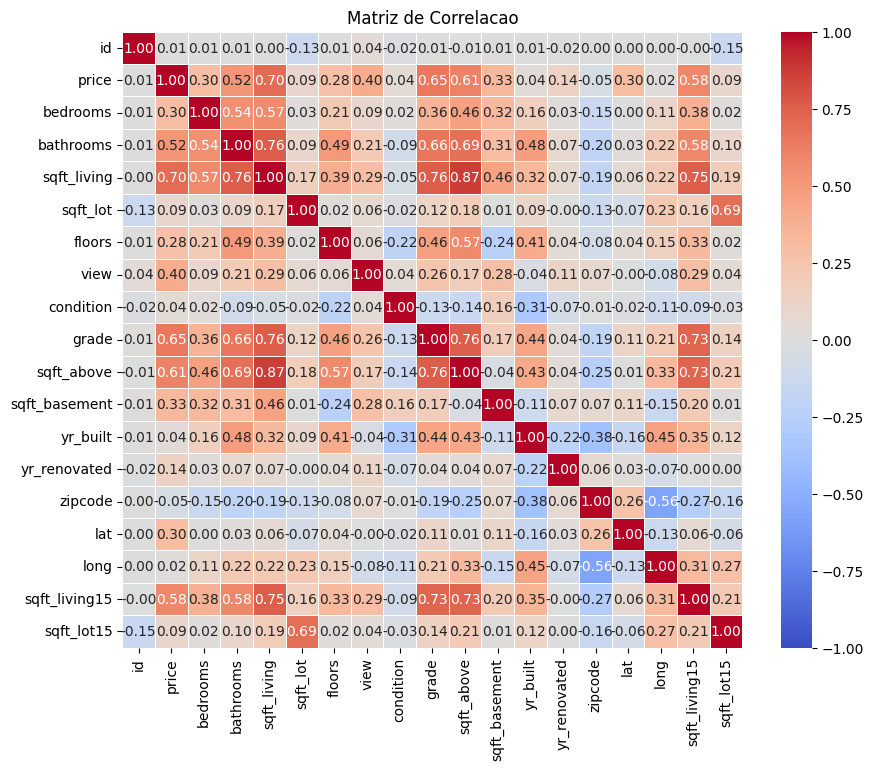

In [131]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_casa, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,vmin='-1',vmax='1')
plt.title('Matriz de Correlacao')
plt.show()

In [132]:
corr_price_bedrooms=df_casa['price'].corr(df_casa['bedrooms'])
corr_price_bedrooms

print("A correlação entre preço e quartos é", round(corr_price_bedrooms,4),", no caso ela é fraca menor que 0.30, porém ainda há uma relação entre eles, onde quanto maior o número de quartos maior o preço do imóvel.")

A correlação entre preço e quartos é 0.2992 , no caso ela é fraca menor que 0.30, porém ainda há uma relação entre eles, onde quanto maior o número de quartos maior o preço do imóvel.


In [133]:
df_zip=df_casa.copy()
df_zip['zipcode']= df_zip['zipcode'].astype(str)
df_zip

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3222049055,20150116T000000,650000.0,3,1.75,2800,19386,1.0,y,4,...,8,1400,1400,1965,0,98198,47.3554,-122.324,3270,31450
9995,7352200100,20150224T000000,1360000.0,2,1.75,2620,14138,2.0,y,4,...,8,2120,500,1931,1991,98125,47.7142,-122.277,1830,8279
9996,3124059023,20150213T000000,1960000.0,3,1.75,3330,12566,1.0,y,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
9997,7352200025,20141013T000000,1190000.0,2,1.75,2080,8112,1.0,y,4,...,8,1040,1040,1939,1984,98125,47.7134,-122.277,2030,8408


In [134]:
#corre_price_sqft_living_bath = round(df_bath['price'].corr(df_bath['sqft_living']),4)

In [135]:
df_casa_2000 = df_casa[df_casa['sqft_living'] > 2000]
df_casa_2000

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,n,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,n,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,n,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,n,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,3343302110,20150306T000000,1800000.0,3,3.00,2790,13295,2.0,y,4,...,10,2370,420,1933,1989,98006,47.5466,-122.197,3140,11949
9994,3222049055,20150116T000000,650000.0,3,1.75,2800,19386,1.0,y,4,...,8,1400,1400,1965,0,98198,47.3554,-122.324,3270,31450
9995,7352200100,20150224T000000,1360000.0,2,1.75,2620,14138,2.0,y,4,...,8,2120,500,1931,1991,98125,47.7142,-122.277,1830,8279
9996,3124059023,20150213T000000,1960000.0,3,1.75,3330,12566,1.0,y,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560


In [136]:
corr_price_bedrooms2000=df_casa_2000['price'].corr(df_casa_2000['bedrooms'])
corr_price_bedrooms2000

print("A correlação entre preço e quartos que o tamanho seja superior a 2000 pés quadrados é", round(corr_price_bedrooms2000,4))

resultado = 'menor' if corr_price_bedrooms2000 < corr_price_bedrooms else 'maior'
print("Nesse caso, o coeficiente de correlação entre o preço e o número de quartos é", resultado)

A correlação entre preço e quartos que o tamanho seja superior a 2000 pés quadrados é 0.1191
Nesse caso, o coeficiente de correlação entre o preço e o número de quartos é menor


## Questão 02

2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

In [137]:
df_casa_bath= df_casa[df_casa['bathrooms'] >= 2]
corr_price_bath=df_casa_bath['price'].corr(df_casa_bath['sqft_living'])

print("A correlação entre preço e área total com casa com pelo menos dois banheiros é", round(corr_price_bath,4),"\nNo caso ela é uma relação positiva forte, acima de 0.70, onde quanto maior a área total maior o preço do imóvel.")

A correlação entre preço e área total com casa com pelo menos dois banheiros é 0.7067 
No caso ela é uma relação positiva forte, acima de 0.70, onde quanto maior a área total maior o preço do imóvel.


## Questão 03

3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

In [138]:
df_casa[['price','bathrooms','sqft_living']].groupby(['bathrooms']).mean()

,price,sqft_living
bathrooms,,
0.00,5.321429e+05,2077.714286
0.50,2.730000e+05,1180.000000
0.75,2.910608e+05,828.432432
1.00,3.518355e+05,1185.012853
1.25,5.706250e+05,1725.000000
1.50,4.157653e+05,1565.513324
1.75,4.444833e+05,1777.332224
2.00,4.545119e+05,1805.068063
2.25,5.407328e+05,2164.008529


In [139]:
corr_bath_price= df_casa[['price', 'sqft_living', 'bathrooms']].corr()
corr_bath_price

,price,sqft_living,bathrooms
price,1.000000,0.702199,0.521193
sqft_living,0.702199,1.000000,0.764810
bathrooms,0.521193,0.764810,1.000000


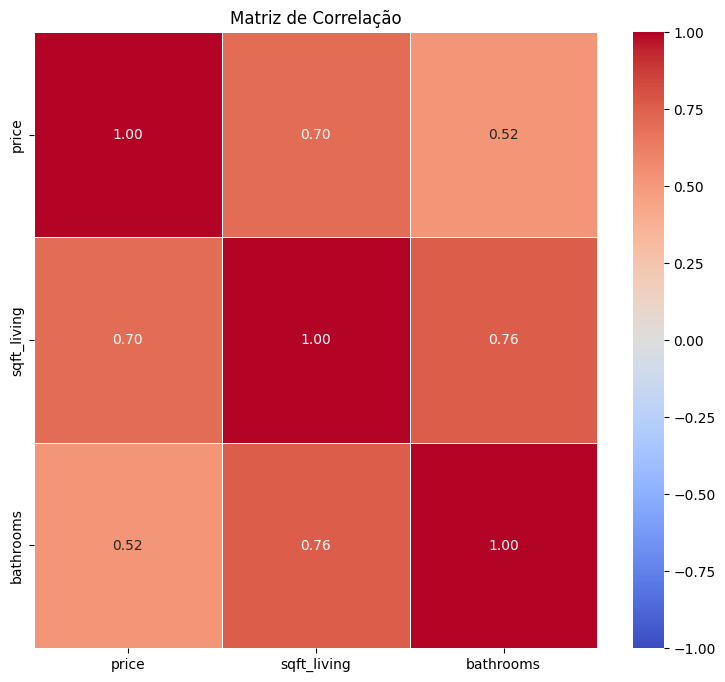

É possível ver correlação forte entre o preço e a área do imóvel, 0.7022
Assim como entre o preço e a quantidade de banheiros 0.5212
E também uma correlação possitiva mais forte entre a área total e a quantidade de banheiros 0.7648


In [140]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(corr_bath_price, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,vmin='-1')
plt.title('Matriz de Correlação')
plt.show()


print("É possível ver correlação forte entre o preço e a área do imóvel,", round(df_casa['price'].corr(df_casa['sqft_living']),4))
print("Assim como entre o preço e a quantidade de banheiros",round(df_casa['price'].corr(df_casa['bathrooms']),4))
print("E também uma correlação possitiva mais forte entre a área total e a quantidade de banheiros",round(df_casa['bathrooms'].corr(df_casa['sqft_living']),4))

Porém como foi aconselhado no plantão tira-dúvidas, irei fazer um range sobre a quantidade de banheiros que é quebrada como vimos no agrupamento lá em cima.

In [141]:
df_bath_filtro = df_casa.copy()
bins = [0,2,4,6,8]
df_bath_filtro['grupos_banho'] = pd.cut(df_bath_filtro['bathrooms'], bins=bins,labels=['Group 1', 'Group 2', 'Group 3','Group 4'])


In [142]:
df_bath_filtro.head(-10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grupos_banho
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Group 1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Group 2
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Group 1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Group 2
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Group 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,1924059029,20140617T000000,4670000.0,5,6.75,9640,13068,1.0,y,4,...,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,Group 4
9985,1121039059,20140522T000000,503000.0,2,1.75,2860,59612,1.0,y,4,...,1510,1350,1948,2003,98023,47.3276,-122.389,2720,59612,Group 1
9986,1724069079,20150319T000000,1450000.0,2,3.25,2070,3128,2.0,y,3,...,1760,310,1988,0,98075,47.5686,-122.060,2740,3568,Group 2
9987,7129303045,20150417T000000,949950.0,5,2.50,2340,1989,2.0,y,4,...,2340,0,1959,0,98118,47.5193,-122.257,2200,3230,Group 2


In [143]:
grupobanho= df_bath_filtro.groupby('grupos_banho')
corr_grupo_banho= grupobanho[['sqft_living','price']].corr()
corr_grupo_banho

C:\Users\FERNANDA\AppData\Local\Temp\ipykernel_17112\48452247.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupobanho= df_bath_filtro.groupby('grupos_banho')


sqft_living     price
grupos_banho                                   
Group 1      sqft_living     1.000000  0.470439
             price           0.470439  1.000000
Group 2      sqft_living     1.000000  0.644169
             price           0.644169  1.000000
Group 3      sqft_living     1.000000  0.760425
             price           0.760425  1.000000
Group 4      sqft_living     1.000000  0.906751
             price           0.906751  1.000000

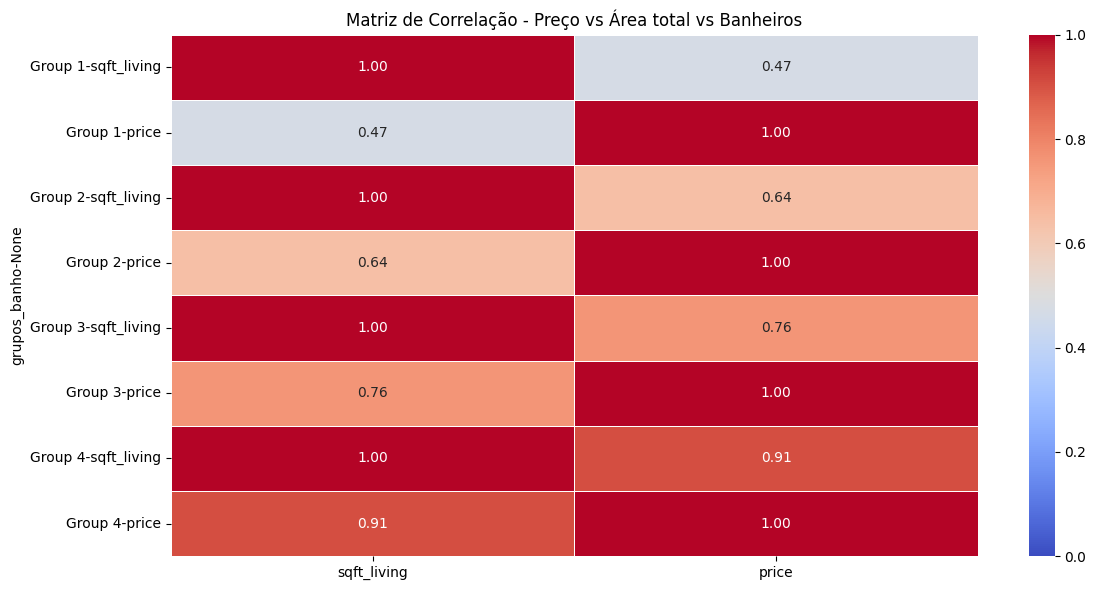

Dessa vez coloquei o tamanho mínimo da coloração para ser valor 0, assim é possível identificar mais os que possuem relação média dos que possuem forte relação.
 Então também é possível ver que a medida que a quantidade de banheiros aumenta a correlação deles também aumenta.


In [144]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_grupo_banho, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,vmin='0')
plt.title('Matriz de Correlação - Preço vs Área total vs Banheiros')

plt.tight_layout()
plt.show()


print('Dessa vez coloquei o tamanho mínimo da coloração para ser valor 0, assim é possível identificar mais os que possuem relação média dos que possuem forte relação.\n Então também é possível ver que a medida que a quantidade de banheiros aumenta a correlação deles também aumenta.')

## Questão 04

4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

In [145]:
df_casa.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [146]:
df_casa_3000= df_casa[df_casa['sqft_living']>3000]
df_casa_3000[['condition','price']].groupby('condition').mean()

,price
condition,
2,7.150000e+05
3,1.016932e+06
4,1.087104e+06
5,1.292893e+06


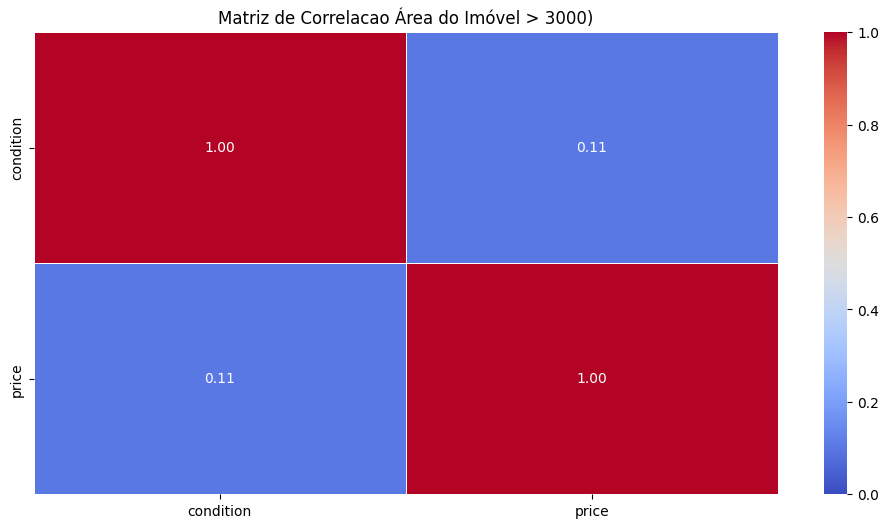

Há uma correlação positiva fraca entre a condição e o preço para áreas maiores que 3000 pés quadrados


In [147]:
corr_condition_price=df_casa_3000[['condition','price']].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_condition_price, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,vmin='0')
plt.title('Matriz de Correlacao Área do Imóvel > 3000)')
plt.show()

print("Há uma correlação positiva fraca entre a condição e o preço para áreas maiores que 3000 pés quadrados")

## Questão 05

5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

Sinceramente achei essa pergunta muito esquisita, considerar a latitude e longitude junto ou separadamente?

- Junto

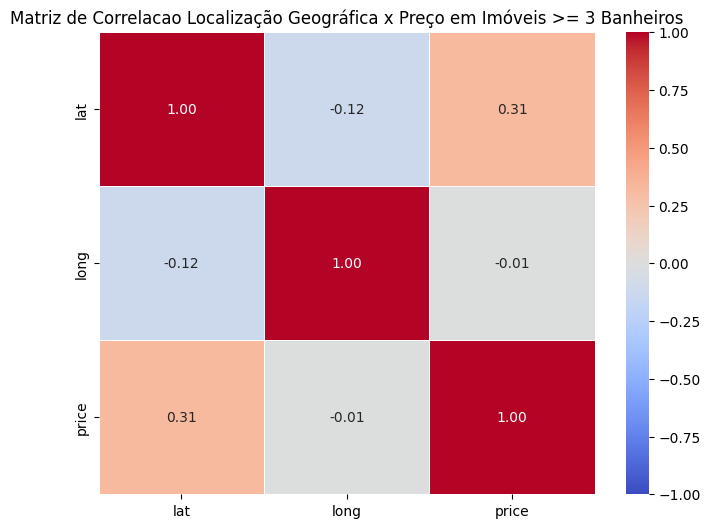

Considerando imóveis com pelo menos 3 quartos.
 A correlação com a latitude é positiva fraca-média (0.31) 
 E com a longitute a relação pode ser considerada que não há tendência de relação por ser próxima de 0 (-0.01)
 ... mas se houver alguma relação é negativa fraca.


In [148]:
df_3quartos = df_casa[df_casa['bedrooms'] >= 3]

corr_lat_long_price = df_3quartos[['lat', 'long', 'price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_lat_long_price, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,vmin='-1')
plt.title('Matriz de Correlacao Localização Geográfica x Preço em Imóveis >= 3 Banheiros')
plt.show()

print("Considerando imóveis com pelo menos 3 quartos.\n A correlação com a latitude é positiva fraca-média (0.31) \n E com a longitute a relação pode ser considerada que não há tendência de relação por ser próxima de 0 (-0.01)\n ... mas se houver alguma relação é negativa fraca.")

- Separadamente

In [149]:

corr_lat_price = df_3quartos['lat'].corr(df_3quartos['price'])
corr_long_price = df_3quartos['long'].corr(df_3quartos['price'])
print(f"Correlação entre lat e price (>= 3 quartos): {corr_lat_price}")
print(f"Correlação entre long e price (>= 3 quartos): {corr_long_price}")

# Após testar acredito que não há muita diferença kk

Correlação entre lat e price (>= 3 quartos): 0.31255514248432165
Correlação entre long e price (>= 3 quartos): -0.007275306992926935


## Questão 06

6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

 Usando anova?? Parece estranho, já que na teoria das aulas existiam formas de tratar as categóricas. <br>
- Tabela de contingencia
- Analisando frequência
- Qui-quadrado

E quando envolvia numérico e categórico eram:
- Boxplot 
- Histograma 

kkkkkkkkkk realmente não sei se foi erro de digitação ou não, ou se quer assim mesmo

In [113]:
df_casa.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [150]:
# vamo com deus

df_casa['waterfront'].value_counts()

waterfront
n    9920
y      79
Name: count, dtype: int64

In [151]:
tabela_contingencia = pd.crosstab(df_casa['waterfront'], columns='count')
print(tabela_contingencia)

col_0       count
waterfront       
n            9920
y              79


In [152]:
chi2, p, lib, esperado= stats.chi2_contingency(tabela_contingencia)
print(f"Estatística do teste Qui-quadrado: {chi2}")
print(f"Valor-p: {p}")

Estatística do teste Qui-quadrado: 0.0
Valor-p: 1.0


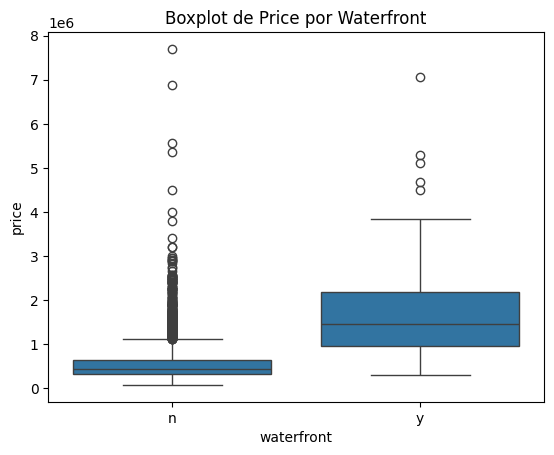

In [153]:
sns.boxplot(x='waterfront', y='price', data=df_casa)
plt.title('Boxplot de Price por Waterfront')
plt.show()

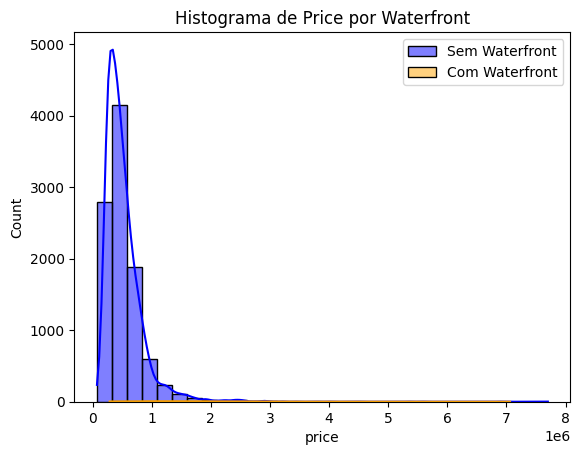

In [154]:
sns.histplot(df_casa[df_casa['waterfront']=='n']['price'], color='blue', label='Sem Waterfront', kde=True, bins=30)
sns.histplot(df_casa[df_casa['waterfront']=='y']['price'], color='orange', label='Com Waterfront', kde=True, bins=30)

plt.title('Histograma de Price por Waterfront')
plt.legend()
plt.show()

Agora vamos fazer o pedido da anova, e antes teste de normalidade

In [157]:
precos_n= df_casa[df_casa['waterfront']== 'n']['price']
precos_y= df_casa[df_casa['waterfront']== 'y']['price']

In [158]:
stat_n, p_n = stats.shapiro(precos_n)
stat_y, p_y = stats.shapiro(precos_y)

print(f"Categoria 'n': Estatística = {stat_n}, Valor-p = {p_n}")
print(f"Categoria 'y': Estatística = {stat_y}, Valor-p = {p_y}")

# Interpretando os resultados
alpha = 0.05
if p_n < alpha:
    print("A amostra 'n' não é normalmente distribuída.")
else:
    print("A amostra 'n' é normalmente distribuída.")

if p_y < alpha:
    print("A amostra 'y' não é normalmente distribuída.")
else:
    print("A amostra 'y' é normalmente distribuída.")

Categoria 'n': Estatística = 0.7194685386986504, Valor-p = 7.713912942727768e-84
Categoria 'y': Estatística = 0.8581515709706844, Valor-p = 3.514606386275572e-07
A amostra 'n' não é normalmente distribuída.
A amostra 'y' não é normalmente distribuída.


c:\Users\FERNANDA\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9920.
  res = hypotest_fun_out(*samples, **kwds)


De acordo com o teste não é normalmente distribuido, então deveria ser aplicado o ANOVA, irei fazer apenas para ver o resultado, e depois prosseguirei com o teste de Mann-Whiteney

In [155]:
f, p_value= stats.f_oneway(precos_n, precos_y)
print(f"Estatística F: {f}, Valor-p: {p_value}")

Estatística F: 964.5733248785583, Valor-p: 2.97380815121432e-202


In [159]:
man, p_man = stats.mannwhitneyu(precos_n, precos_y)
print(f"Estatística Mann-Whitney: {man}, Valor-p: {p_man}")

# Interpretando o resultado
if p_man < alpha:
    print("Há uma diferença significativa entre as categorias 'n' e 'y'.")
else:
    print("Não há diferença significativa entre as categorias 'n' e 'y'.")

Estatística Mann-Whitney: 81950.5, Valor-p: 7.660024711172743e-34
Há uma diferença significativa entre as categorias 'n' e 'y'.


In [163]:
#Vi que há alguns modos para fazer atender a normalidade e é transformar os dados, nesse caso fazendo uma transformação logaritma


precos_n_log=np.log(precos_n + 1)
precos_y_log=np.log(precos_y + 1)

# Realizar o teste de normalidade novamente
stat_n_log, p_n_log= stats.shapiro(precos_n_log)
stat_y_log, p_y_log= stats.shapiro(precos_y_log)
print(f"Categoria 'n' após log: Estatística = {stat_n_log}, Valor-p = {p_n_log}")
print(f"Categoria 'y' após log: Estatística = {stat_y_log}, Valor-p = {p_y_log}")

Categoria 'n' após log: Estatística = 0.9916004526568755, Valor-p = 9.91662403662182e-24
Categoria 'y' após log: Estatística = 0.9885614236016874, Valor-p = 0.7096015466258354


Agora as questões irão mudar de conjunto de dados, esse sendo sobre car_price

## Questão 07

7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.



In [165]:
df_car = pd.read_csv('car_price.csv')
df_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [166]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [167]:
df_car.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [168]:
df_car.describe(include='object')

,Make,Model,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain
count,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874
unique,32,955,7,2,75,16,4,3,104,309,264,3
top,Maruti Suzuki,X1 sDrive20d xLine,Diesel,Manual,Mumbai,White,First,Individual,1197 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD
freq,398,15,954,1037,302,727,1504,1816,230,90,90,1319


In [175]:
positive_corr = corr_car[corr_car > 0.1]
positive_corr

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.000000,0.309381,NaN,0.568875,0.577100,NaN,NaN,0.586109
Year,0.309381,1.000000,NaN,NaN,0.182220,0.126849,NaN,NaN
Kilometer,NaN,NaN,1.000000,NaN,NaN,NaN,0.111103,NaN
Length,0.568875,NaN,NaN,1.000000,0.797228,0.194704,0.298527,0.809812
Width,0.577100,0.182220,NaN,0.797228,1.000000,0.326928,0.229056,0.791316
Height,NaN,0.126849,NaN,0.194704,0.326928,1.000000,0.695373,0.408717
Seating Capacity,NaN,NaN,0.111103,0.298527,0.229056,0.695373,1.000000,0.313928
Fuel Tank Capacity,0.586109,NaN,NaN,0.809812,0.791316,0.408717,0.313928,1.000000


Como sabemos a correlação é medida em um intervalo de -1 a 1, onde:

- 1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta). <br>
- -1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui).<br>
- 0 indica ausência de correlação linear entre as variáveis.

Exemplo de correlação positiva:
                        Price      Year  Kilometer    Length     Width  \
Price               1.000000  0.309381        NaN  0.568875  0.577100   
Year                0.309381  1.000000        NaN       NaN  0.182220   
Kilometer                NaN       NaN   1.000000       NaN       NaN   
Length              0.568875       NaN        NaN  1.000000  0.797228   
Width               0.577100  0.182220        NaN  0.797228  1.000000   
Height                   NaN  0.126849        NaN  0.194704  0.326928   
Seating Capacity         NaN       NaN   0.111103  0.298527  0.229056   
Fuel Tank Capacity  0.586109       NaN        NaN  0.809812  0.791316   

                      Height  Seating Capacity  Fuel Tank Capacity  
Price                    NaN               NaN            0.586109  
Year                0.126849               NaN                 NaN  
Kilometer                NaN          0.111103                 NaN  
Length              0.194704     

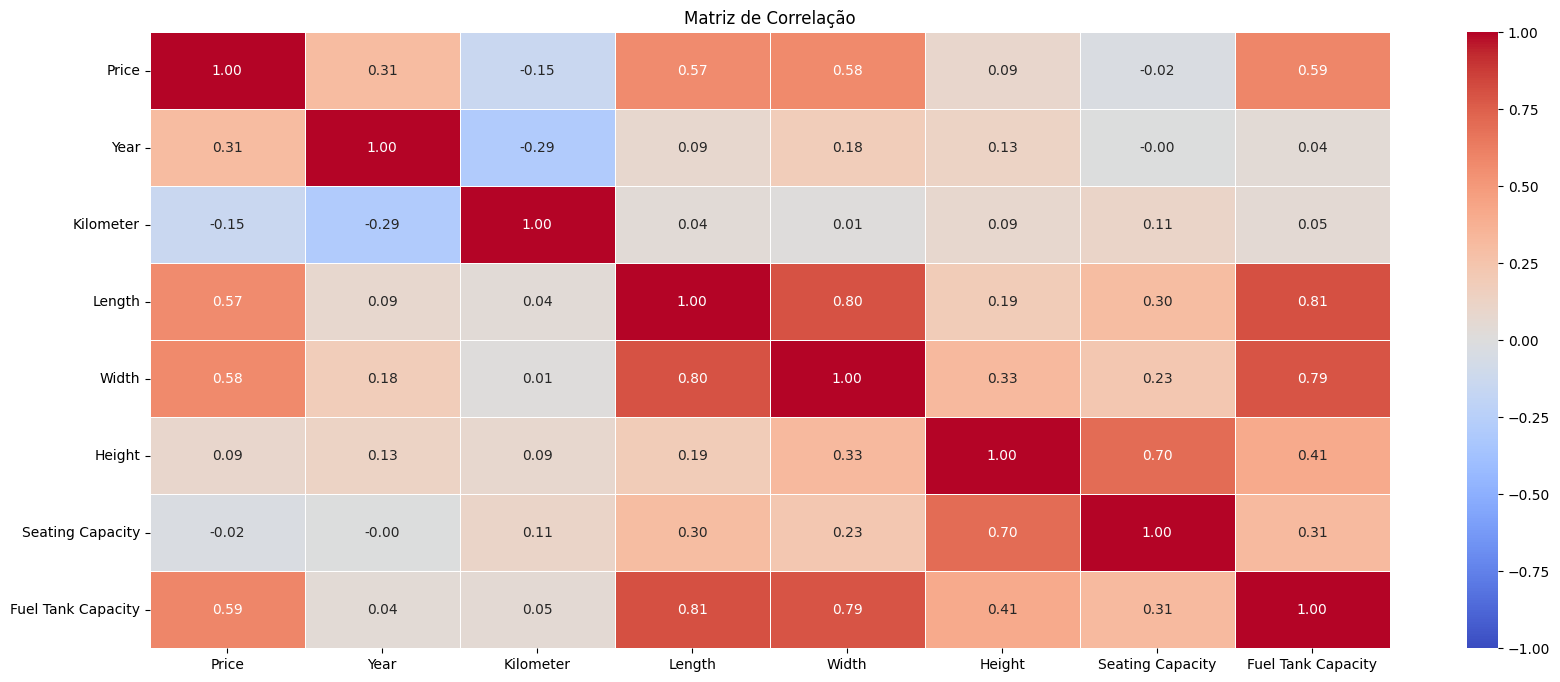

Há uma clara correlação entre o tamanho físico do veículo (comprimento, largura) e a capacidade do tanque de combustível, sugerindo que veículos maiores geralmente têm mais espaço para um tanque maior.
O preço também está fortemente relacionado com o tamanho do veículo, possivelmente indicando que veículos maiores ou mais robustos tendem a ser mais caros.
Quilometragem tem uma correlação negativa com o preço e o ano de fabricação, o que é esperado.
A altura e a capacidade de assentos não parecem ter uma relação linear forte com outras variáveis, exceto entre si.

 Em resumo, a variável Fuel Tank Capacity é a que gera mais correlação entre todas as outras.


In [179]:
corr_car = df_car.corr(numeric_only=True)

positive_corr = corr_car[corr_car > 0.1]
negative_corr = corr_car[corr_car < -0.1]
neutral_corr = corr_car[(corr_car > -0.1) & (corr_car < 0.1)]

print("Exemplo de correlação positiva:\n", pd.DataFrame(positive_corr))
print("Exemplo de correlação negativa:\n", negative_corr)
print("Exemplo de variáveis com baixa correlação:\n", neutral_corr)

plt.figure(figsize=(20, 8))
sns.heatmap(corr_car, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,vmin='-1')
plt.title('Matriz de Correlação')
plt.show()

print("Há uma clara correlação entre o tamanho físico do veículo (comprimento, largura) e a capacidade do tanque de combustível, sugerindo que veículos maiores geralmente têm mais espaço para um tanque maior.")
print("O preço também está fortemente relacionado com o tamanho do veículo, possivelmente indicando que veículos maiores ou mais robustos tendem a ser mais caros.")
print("Quilometragem tem uma correlação negativa com o preço e o ano de fabricação, o que é esperado.")
print("A altura e a capacidade de assentos não parecem ter uma relação linear forte com outras variáveis, exceto entre si.")
print("\n Em resumo, a variável Fuel Tank Capacity é a que gera mais correlação entre todas as outras.")

## Questão 08

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price

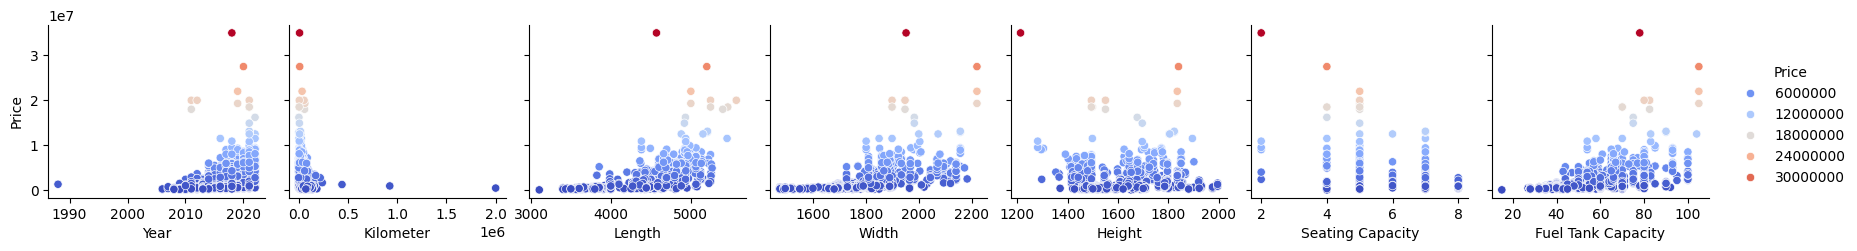

A partir da análise dos gráficos de dispersão, assim como observado na questão 7, há uma correlação positiva (mas fraca) entre as dimensões e capacidade de armazenamento de combustível com o preço.


In [182]:
# EU achei fantástico esse modulo do seaborn mostrado em aula, o pairplot

sns.pairplot(df_car, y_vars='Price', palette = 'coolwarm', hue='Price')
plt.show()
print("A partir da análise dos gráficos de dispersão, assim como observado na questão 7, há uma correlação positiva (mas fraca) entre as dimensões e capacidade de armazenamento de combustível com o preço.")

## Questão 09

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

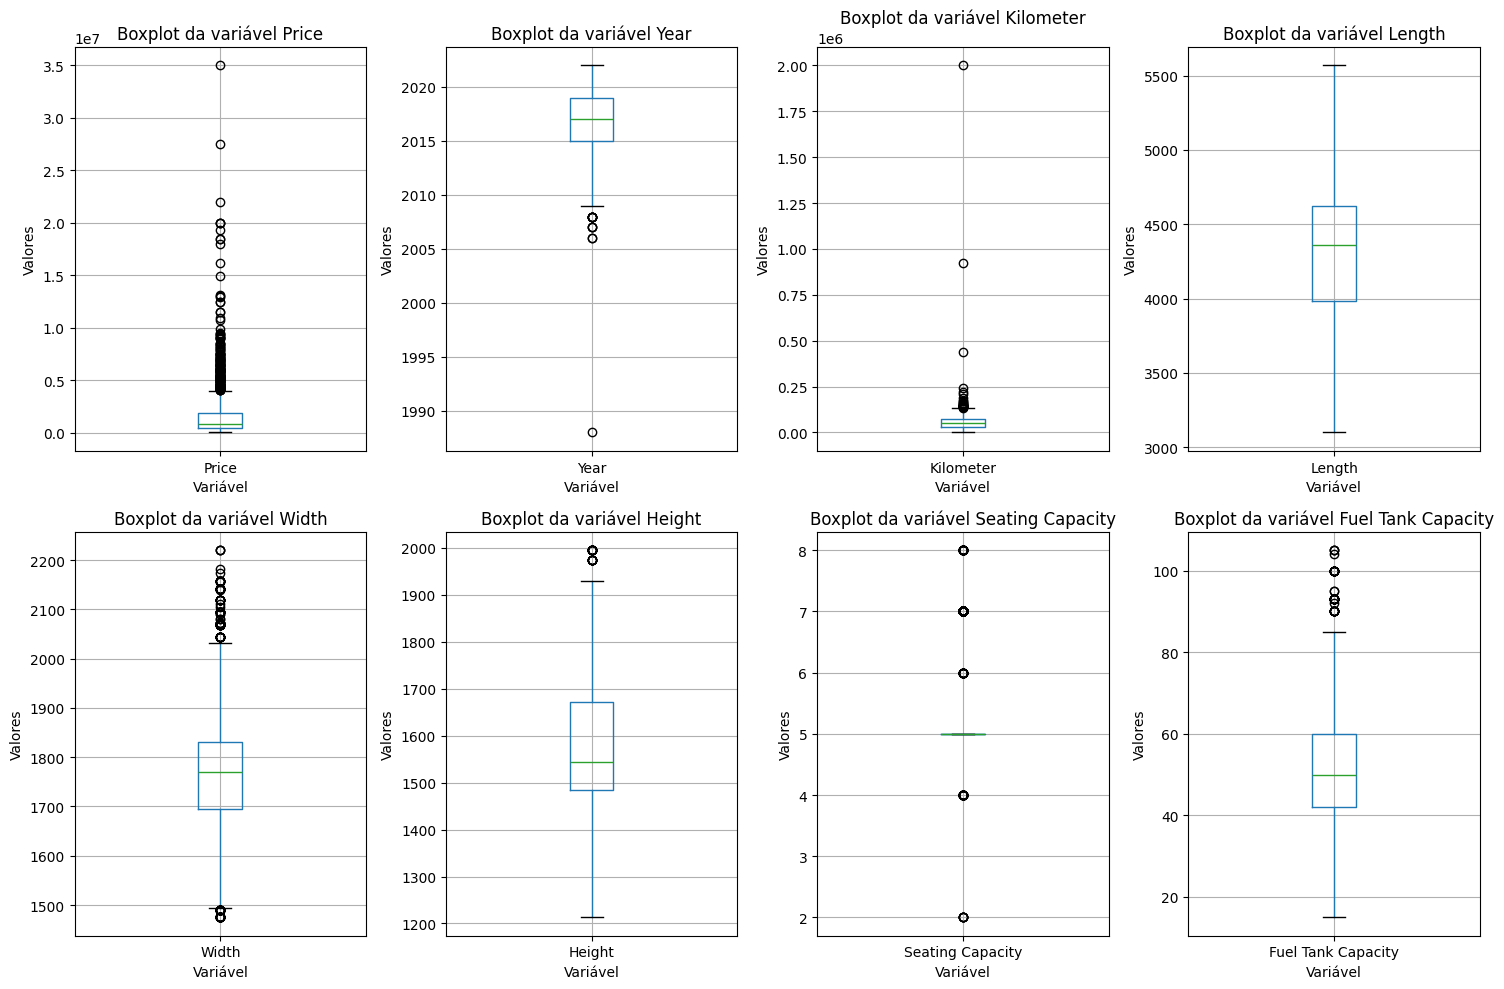

In [187]:
colunas_num = df_car.select_dtypes(include='number').columns

num_rows= 2
num_cols= 4  #colocar 4 boxplots por linha, pq tinham 8 no total

fig, axes= plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(len(colunas_num)):
    ax = axes[i // num_cols, i % num_cols]  # calcula a posição do subplot
    df_car.boxplot(column=colunas_num[i], ax=ax)
    ax.set_title(f'Boxplot da variável {colunas_num[i]}')
    ax.set_ylabel('Valores')
    ax.set_xlabel('Variável')

# Ajusta o layout para melhor visualização
plt.tight_layout()
plt.show()

Uma amiga aconselhou sobre criar funções para facilitar

In [199]:
import statsmodels.api as sm

def tabela_e_plot(X, y, y_label,x_label):
    X = sm.add_constant(X) #constante
    model = sm.OLS(y, X).fit()

    print(model.summary()) #tabela
    #gráfico
    plt.scatter(X.iloc[:, 1], y, label='Data')
    plt.plot(X.iloc[:, 1], model.predict(X), color='red', label='Regression Line')
    plt.title(f'Regressão Linear Simples para {y_label} vs {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [191]:
df_car.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

De acordo com as correlações feitas nas questões anteriores decidi ver sobre a capacidade do tanque e os outros

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          2.59e-173
Time:                        22:59:53   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.177e+06   1.63

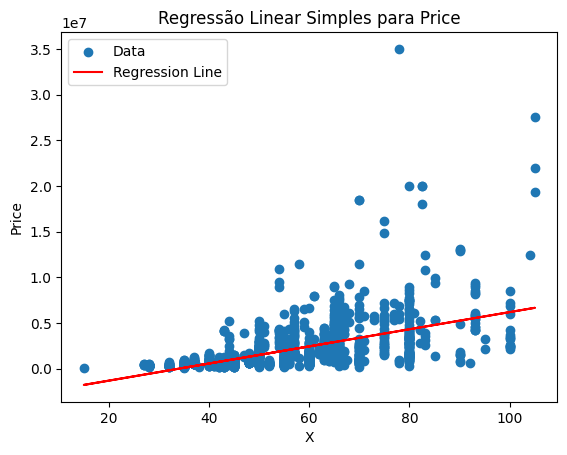

In [195]:
# X = df_car['Fuel Tank Capacity']
# y = df_car['Price']

# linear_regression_and_plot(X, y, 'Price','Fuel Tank')

                            OLS Regression Results                            
Dep. Variable:     Fuel Tank Capacity   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          2.59e-173
Time:                        23:07:39   Log-Likelihood:                -7359.9
No. Observations:                1874   AIC:                         1.472e+04
Df Residuals:                    1872   BIC:                         1.473e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9212      0.348    131.962      0.0

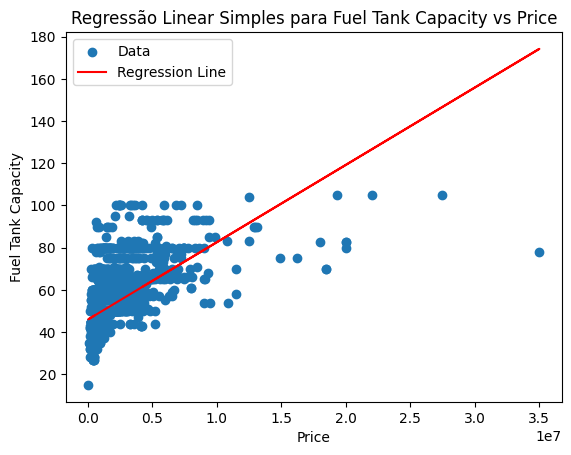

                            OLS Regression Results                            
Dep. Variable:     Fuel Tank Capacity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.775
Date:                Sun, 13 Oct 2024   Prob (F-statistic):             0.0522
Time:                        23:07:39   Log-Likelihood:                -7752.4
No. Observations:                1874   AIC:                         1.551e+04
Df Residuals:                    1872   BIC:                         1.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -384.9890    225.031     -1.711      0.0

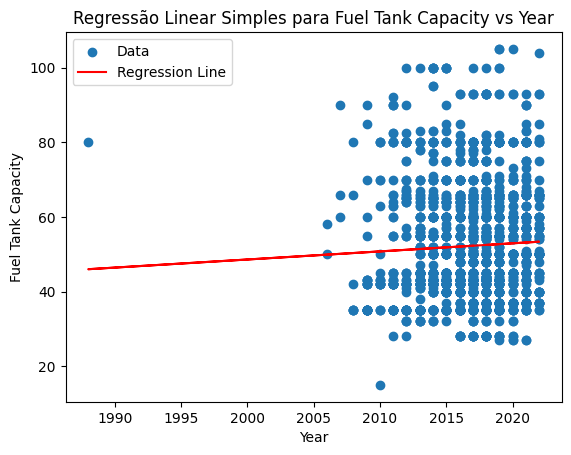

                            OLS Regression Results                            
Dep. Variable:     Fuel Tank Capacity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.163
Date:                Sun, 13 Oct 2024   Prob (F-statistic):             0.0232
Time:                        23:07:40   Log-Likelihood:                -7751.7
No. Observations:                1874   AIC:                         1.551e+04
Df Residuals:                    1872   BIC:                         1.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.4978      0.472    109.111      0.0

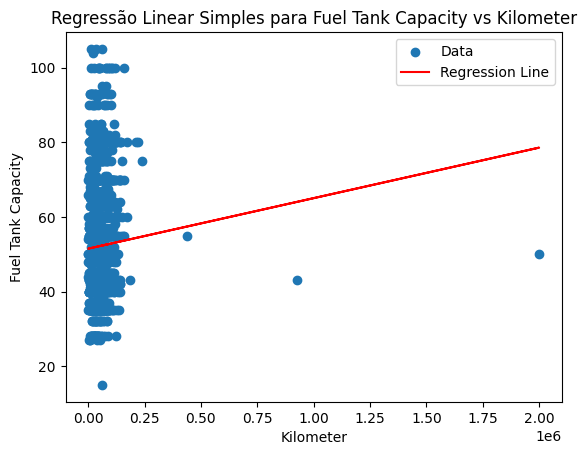

                            OLS Regression Results                            
Dep. Variable:     Fuel Tank Capacity   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     3567.
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:07:40   Log-Likelihood:                -6754.9
No. Observations:                1874   AIC:                         1.351e+04
Df Residuals:                    1872   BIC:                         1.352e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3368      2.029    -33.679      0.0

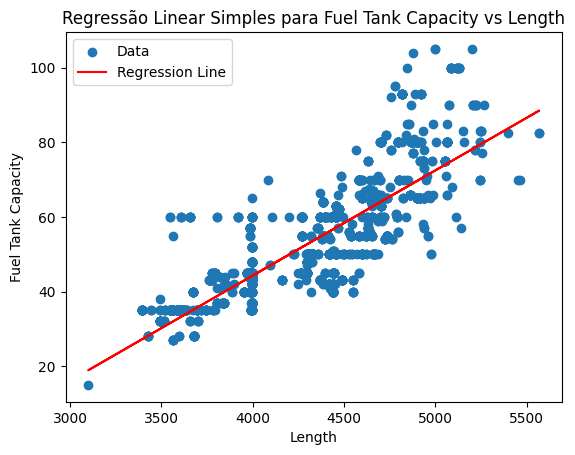

                            OLS Regression Results                            
Dep. Variable:     Fuel Tank Capacity   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     3136.
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:07:40   Log-Likelihood:                -6832.3
No. Observations:                1874   AIC:                         1.367e+04
Df Residuals:                    1872   BIC:                         1.368e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -109.3293      2.893    -37.793      0.0

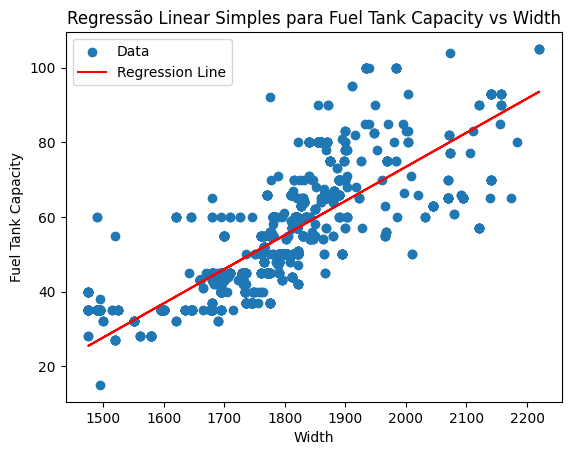

                            OLS Regression Results                            
Dep. Variable:     Fuel Tank Capacity   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     375.4
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           2.25e-76
Time:                        23:07:40   Log-Likelihood:                -7583.0
No. Observations:                1874   AIC:                         1.517e+04
Df Residuals:                    1872   BIC:                         1.518e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.9488      3.790     -5.528      0.0

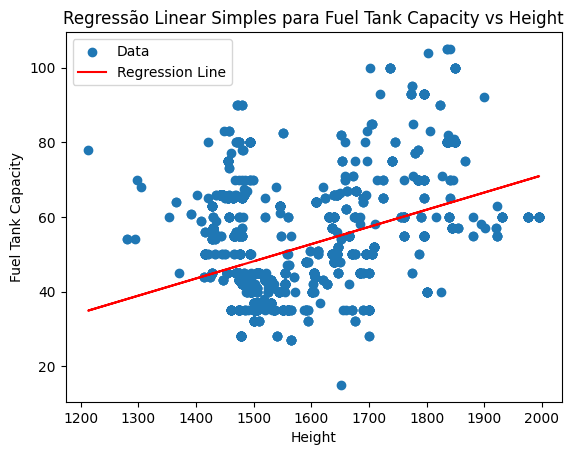

                            OLS Regression Results                            
Dep. Variable:     Fuel Tank Capacity   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           3.91e-44
Time:                        23:07:40   Log-Likelihood:                -7657.0
No. Observations:                1874   AIC:                         1.532e+04
Df Residuals:                    1872   BIC:                         1.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.9759      2.209  

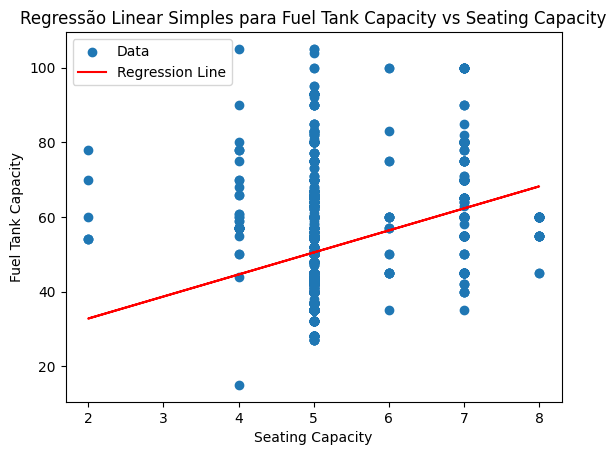

In [201]:
def regressao_variaveis(df, target):
    colunas_num = df.select_dtypes(include='number').columns
    
    # Iterar sobre todas as colunas numéricas, exceto a variável target (dependente)
    for col in colunas_num:
        if col != target: # para não fazer a coluna da variável com ela mesma
            X = df[[col]]
            y = df[target]
            tabela_e_plot(X, y, target, col)

regressao_variaveis(df_car, 'Fuel Tank Capacity')

## Questão 10

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

In [202]:
#reutilizadno coisas de antes, porém agora pra plotar os resíduos

def plot_residuos(model, x_label, y_label):
    residuals = model.resid

    plt.figure(figsize=(8, 6))
    plt.scatter(model.predict(), residuals, alpha=0.8)
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    plt.title(f'Gráfico de Resíduos para {y_label} vs {x_label}')
    plt.xlabel('Valores Preditos')
    plt.ylabel('Resíduos')
    plt.grid(True)
    plt.show()

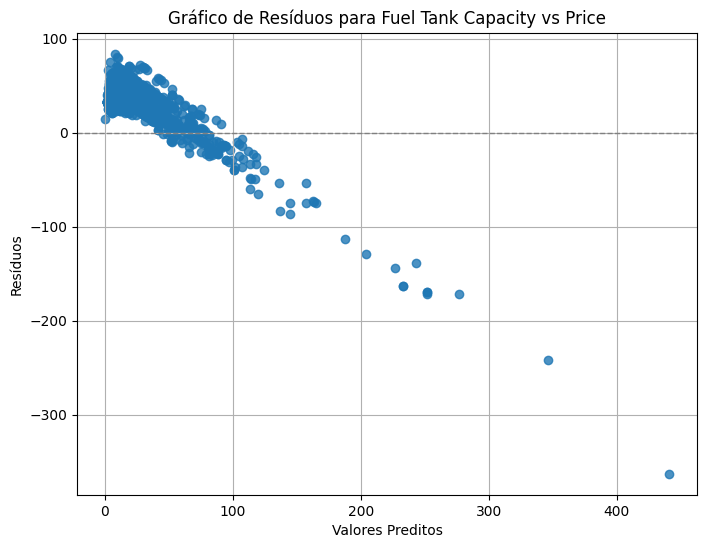

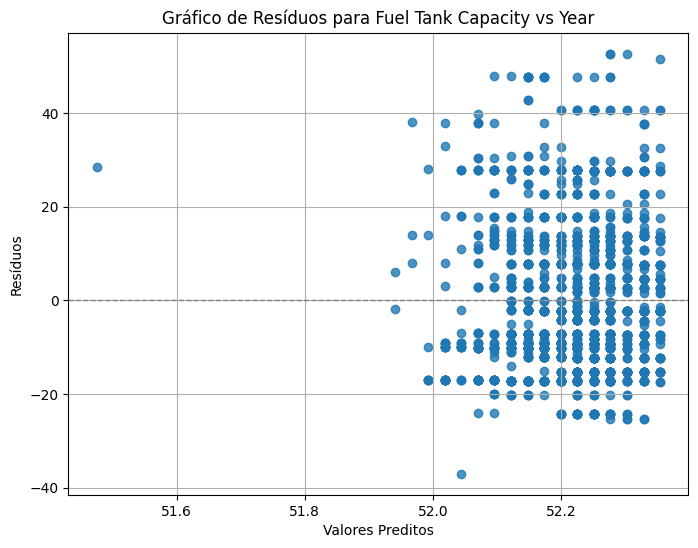

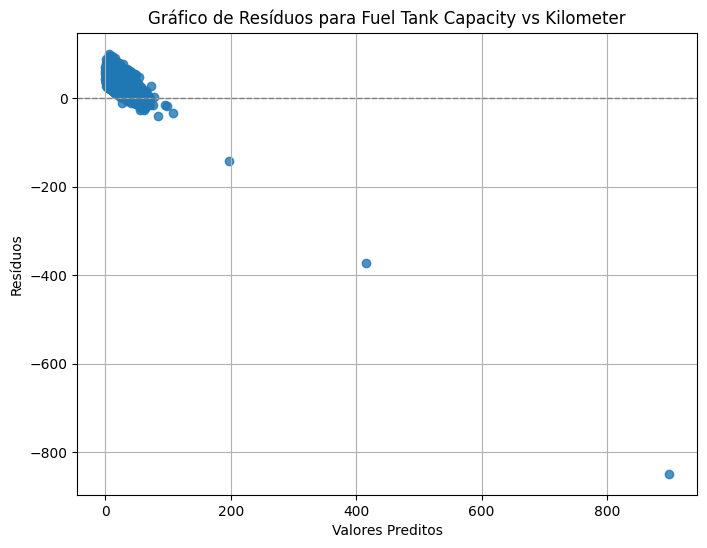

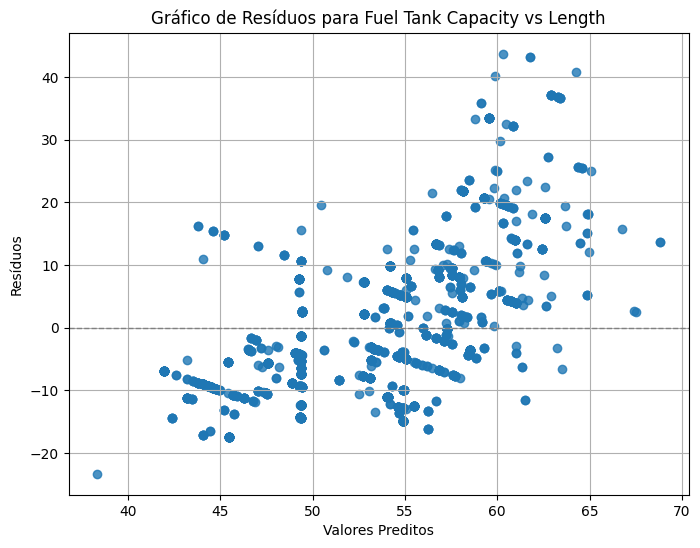

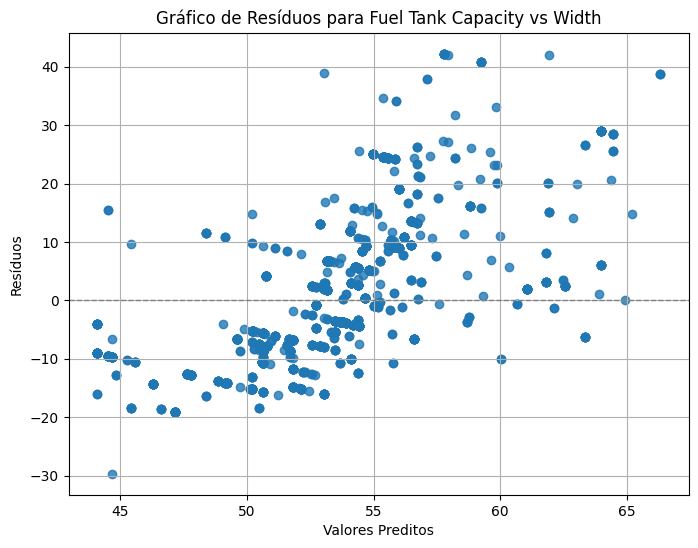

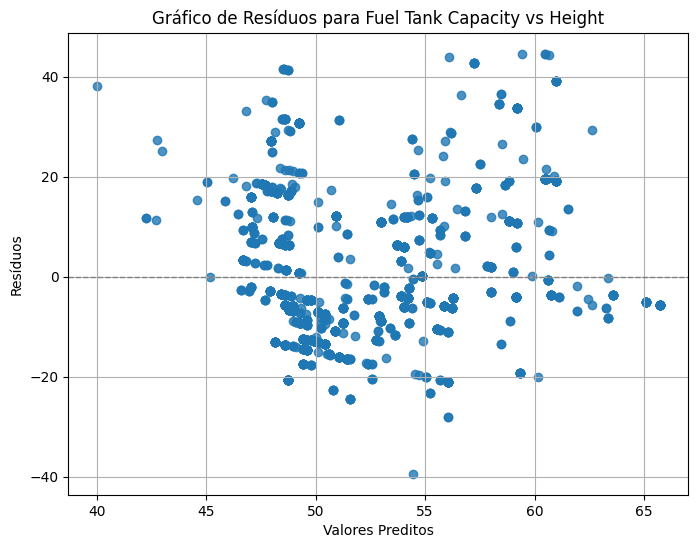

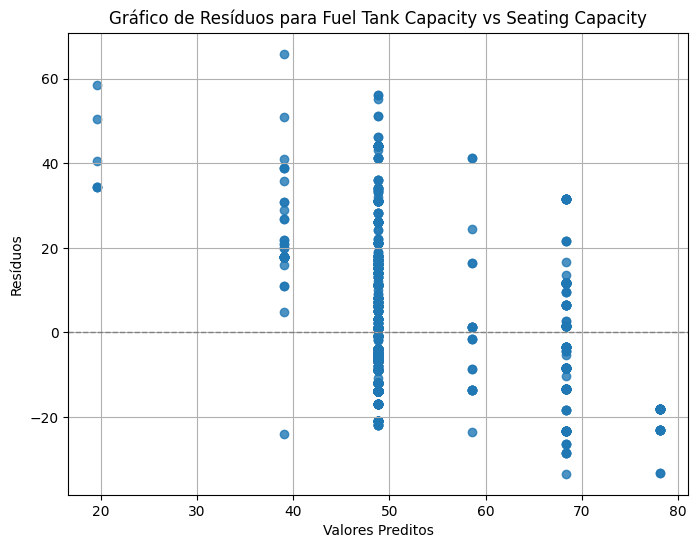

In [211]:
# def tabela_e_plot_com_residuos(X, y, y_label, x_label):
#     X = sm.add_constant(X)  # Adicionar constante
#     model = sm.OLS(y, X).fit()

#     # Chamar a função para plotar resíduos
#     plot_residuos(model, x_label, y_label)

def regressao_com_residuos(df, target):
    colunas_num = df.select_dtypes(include='number').columns
    
    # Iterar sobre todas as colunas numéricas, exceto a variável target
    for col in colunas_num:
        if col != target:
            X = df[[col]]
            y = df[target]
            #tabela_e_plot_com_residuos(X, y, target, col)
            model = sm.OLS(y, X).fit()

    # Chamar a função para plotar resíduos
            plot_residuos(model, col, target)

regressao_com_residuos(df_car, 'Fuel Tank Capacity')

## Questão 11

11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     29.95
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           6.58e-19
Time:                        23:28:50   Log-Likelihood:                -30166.
No. Observations:                1874   AIC:                         6.034e+04
Df Residuals:                    1870   BIC:                         6.036e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.616e+06   6.61e+05  

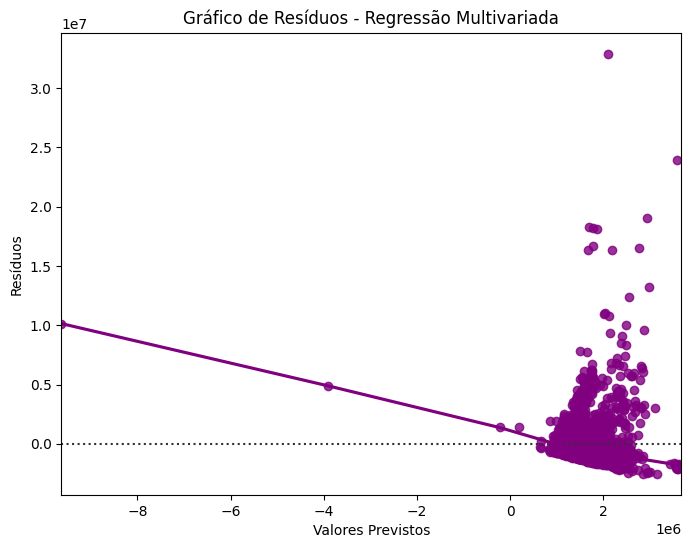

In [222]:
X_multi = df_car[['Seating Capacity', 'Height', 'Kilometer']]
y_multi = df_car['Price']

X_multi = sm.add_constant(X_multi)

model_multi = sm.OLS(y_multi, X_multi).fit()
print(model_multi.summary())

residuals_multi = model_multi.resid

plt.figure(figsize=(8, 6))
sns.residplot(x=model_multi.predict(X_multi), y=residuals_multi, lowess=True, color='purple')
plt.title('Gráfico de Resíduos - Regressão Multivariada')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     426.5
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          4.58e-211
Time:                        23:28:20   Log-Likelihood:                -29721.
No. Observations:                1874   AIC:                         5.945e+04
Df Residuals:                    1870   BIC:                         5.947e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.039e+07   7.78

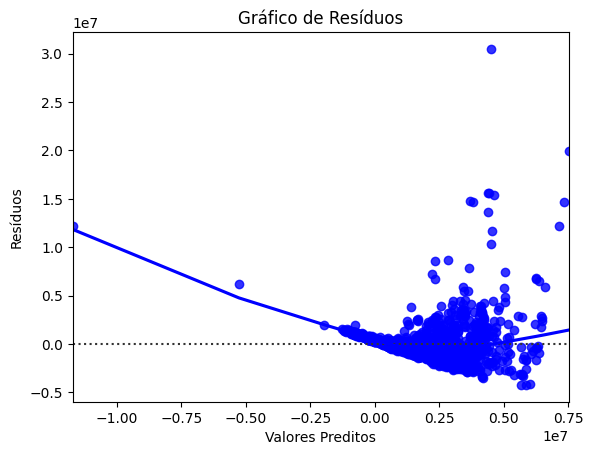

In [221]:
# Definindo variáveis independentes (X) e variável dependente (y)
X = df_car[['Fuel Tank Capacity', 'Width', 'Length']]
y = df_car['Price']

# Adicionar constante ao X
X = sm.add_constant(X)

# Ajustando o modelo de regressão multivariada
model = sm.OLS(y, X).fit()

# Exibindo a tabela de regressão
print(model.summary())

# Plotando o gráfico dos resíduos
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color='blue')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()


Ao adicionar a variável Seating Capacity e Kilometer faz mudar totalmente o gráfico de resíduos, afinal kimoleter tinha correlação negativa e seating capacity correlações bem baixas, ou no caso, não havia correlação quando comparado com price. E na tabela deles, a primeira, o valor de F é bem baixa, e o R^2 também.